# Debt to GDP Calculations
---

### Import Libraries 

In [1]:
import os
import csv

import pandas as pd 
import numpy as np 
import datetime as dt 

import matplotlib.pyplot as plt

from matplotlib.ticker import FuncFormatter

### Import `debtToGDP.py` 

In [2]:
import debtToGDP as dtg
debtion = dtg.DEBT(dtg.measurements)

### Set Y-Ticks to Millions

In [3]:
# Set YTicks to Millions
def millions(x, pos):
    return '%1.1fT' % (x * 1e-6)

formatter = FuncFormatter(millions)

## Debt By Category:
---

In [4]:
# Total Household and Non-Profit Debt 
house_debt = debtion.total_household_nonprofit_debt()

# Total US Government Debt 
gov_debt = debtion.total_gov_debt()

# Total US Business Debt 
biz_debt = debtion.total_business_debt()

### Plot

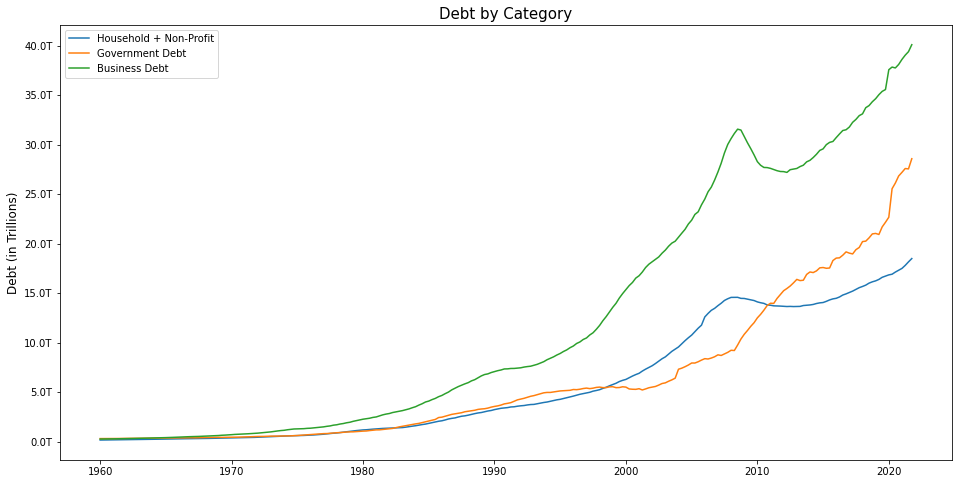

In [5]:
# Plotting 
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(house_debt['debt_sum'], label='Household + Non-Profit')
ax.plot(gov_debt['debt_sum'], label='Government Debt')
ax.plot(biz_debt['debt_sum'], label='Business Debt')

ax.set_title('Debt by Category', fontsize=15)
ax.set_ylabel('Debt (in Trillions)', fontsize=12)
ax.yaxis.set_major_formatter(formatter)
ax.legend(loc=2)

## Debt to GDP
---

In [6]:
# US Debt to GDP
d_gdp = debtion.usDebt_to_gdp()

# YOY Debt to GDP Change
yoy = debtion.yoy_debt_to_gdp_change()

### Plot

Text(0, 0.5, 'YOY Change in Debt to GDP')

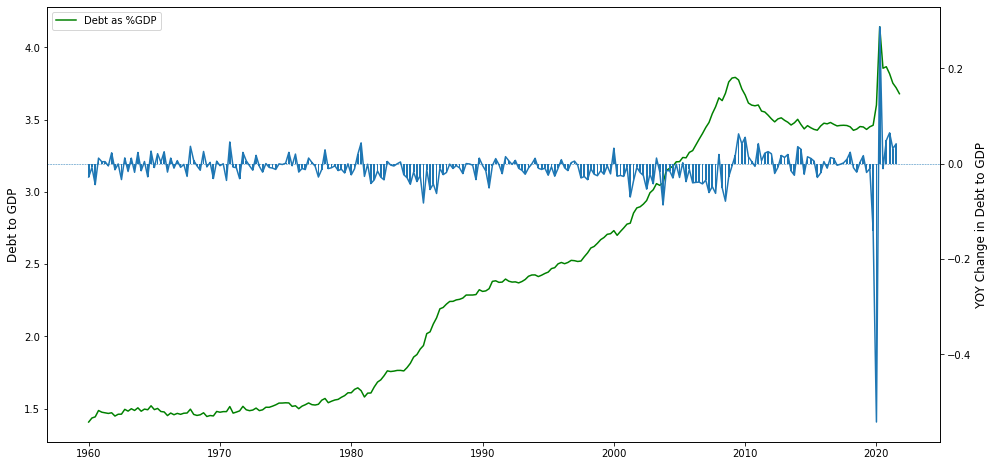

In [45]:
# Plotting 
fig, ax = plt.subplots(figsize=(16,8))

ax.plot(d_gdp['Debt_as_%_GDP'], label='Debt as %GDP',color='g')
ax.set_ylabel('Debt to GDP', fontsize=12)
ax.legend(loc=2)

ax2 = ax.twinx()
ax2.plot(yoy.index,yoy['Change'])
ax2.bar(yoy.index, yoy['Change'], width=50)
ax2.axhline(y=0, linewidth=.5, linestyle='--')
ax2.set_ylabel('YOY Change in Debt to GDP', fontsize=12)

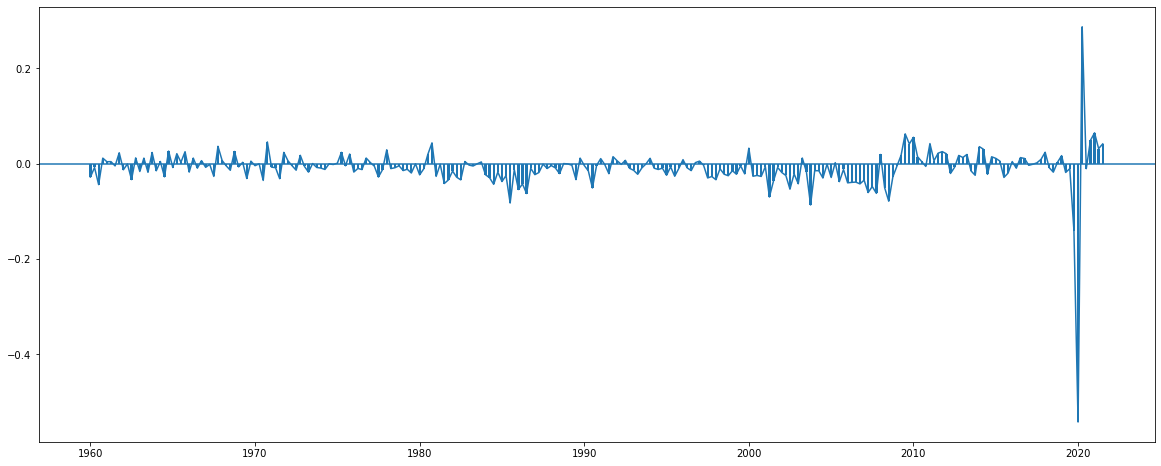

In [40]:
plt.figure(figsize=(20,8))

plt.plot(yoy.index,yoy['Change'])
plt.bar(yoy.index, yoy['Change'], width=50)
plt.axhline(y=0)

In [9]:
yoy 

,ASTLL,ASTDSL,GDP,Total_Debt,Debt_as_%_GDP,Change
DATE,,,,,,
1960-01-01,349880.0,413378.0,542648.0,763258.0,1.406543,-0.028002
1960-04-01,360974.0,415230.0,541080.0,776204.0,1.434546,-0.007881
1960-07-01,366810.0,420184.0,545604.0,786994.0,1.442427,-0.043862
1960-10-01,376713.0,426176.0,540197.0,802889.0,1.486289,0.011716
1961-01-01,376828.0,426841.0,545018.0,803669.0,1.474573,0.004097
...,...,...,...,...,...,...
2020-10-01,29921572.0,53108991.0,21477597.0,83030563.0,3.865915,0.048827
2021-01-01,30317768.0,53804076.0,22038226.0,84121844.0,3.817088,0.064804
2021-04-01,30756356.0,54574168.0,22740959.0,85330524.0,3.752283,0.031686
